In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Dataset

In [2]:
df = pd.read_csv('/Users/enrista/Downloads/MarshMcLennan/LR_Model2/hurricane_vessel_dataset_unique_encoded.csv', header=0)

In [3]:
y = df['PathChange']
X = df.drop(columns=['PathChange'])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [5]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Best Performing Model

In [12]:
logistic_regression_model = LogisticRegression(C=0.01, solver='liblinear', multi_class='auto')

# Train the model
logistic_regression_model.fit(X_train, y_train)

print('The fitted weights and intercept with sklearn are:')
print(logistic_regression_model.coef_, logistic_regression_model.intercept_)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
print(f"\nModel with C=0.1 and solver=liblinear:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

The fitted weights and intercept with sklearn are:
[[-7.50164279e-03  4.41451029e-01  2.05604792e-01 -3.63368759e-02
   1.47237779e-01  1.18440636e-01 -1.58151591e-01 -2.80944318e-02
   6.37089386e-02 -5.02687668e-02  2.48555874e-02 -5.12530936e-02
  -6.50679028e-02  4.83839609e-02  2.44882740e-02  6.80663533e-02
   7.91847471e-02 -4.36142255e-02  2.86452742e-02 -5.84938341e-02
  -8.98915280e-02 -2.44809643e-02 -7.22811570e-03  2.94658544e-04
  -5.51473182e-02  6.84165667e-02  2.99107215e-02  2.60050423e-02
   2.93350431e-02 -2.34691898e-02 -9.32128995e-04  1.05613015e-02]] [1.05378759]

Model with C=0.1 and solver=liblinear:
Accuracy: 0.7807486631016043
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.35      0.41        82
           1       0.83      0.90      0.87       292

    accuracy                           0.78       374
   macro avg       0.67      0.63      0.64       374
weighted avg       0.76      0.78      0.

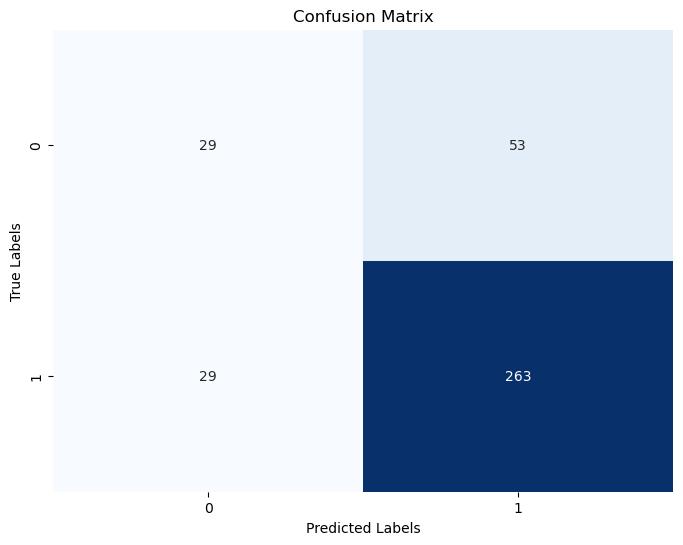

In [14]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()